In [1]:
import numpy as np

# Create an array
array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Create an index list
index_list = [0, 2]

# Create a new array containing only the columns specified in the index list
new_array = np.array_split(array, index_list)

print(new_array)

[array([], shape=(0, 3), dtype=int64), array([[1, 2, 3],
       [4, 5, 6]]), array([[7, 8, 9]])]


In [2]:
import numpy as np
from scipy.integrate import odeint

Ca0 = 2     # Entering concentration
vo = 2      # volumetric flow rate
volume = 20 # total volume of reactor, spacetime = 10
k = 1       # reaction rate constant

N = 100     # number of points to discretize the reactor volume on

Sp = 1 # No. of species
init = np.zeros((Sp,N))    # Concentration in reactor at t = 0()
for i in np.arange(Sp):
    init[i,0] = Ca0  


V = list(np.linspace(0, volume, N)) # discretized volume elements
V = np.array(V*Sp).reshape(Sp,-1).reshape(-1)
tspan = np.linspace(0, 25)    # time span to integrate over

Vol = V
def method_of_lines(C, t):
    'coupled ODES at each node point'
    D = []
    C = C.reshape(Sp,N)
    V = Vol.reshape(Sp,N)
    for i in np.arange(Sp):
        d_i = -vo * np.diff(C[i,:]) / np.diff(V[i,:]) - k * C[i,1:]**2
        
        D.append(d_i)
        
#     D = np.transpose(D)  
    D = np.array(D)
    D = D.reshape(-1)
#     print(np.shape(D))
    return np.concatenate([[0]*Sp, #C0 is constant at entrance
                            D])


In [3]:
init = init.reshape(-1)
sol = odeint(method_of_lines, init, tspan) #time, Volume
sol = sol.reshape(len(tspan),Sp,N)


Text(0, 0.5, '$C_A$ at exit')

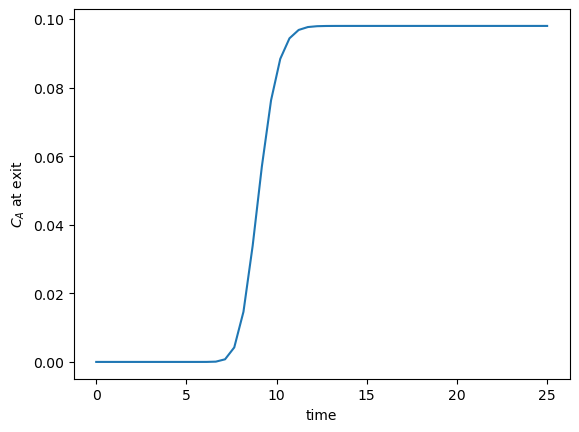

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(tspan, sol[:,0,-1])
plt.xlabel('time')
plt.ylabel('$C_A$ at exit')
# plt.savefig('images/transient-pfr-1.png')


<IPython.core.display.Javascript object>


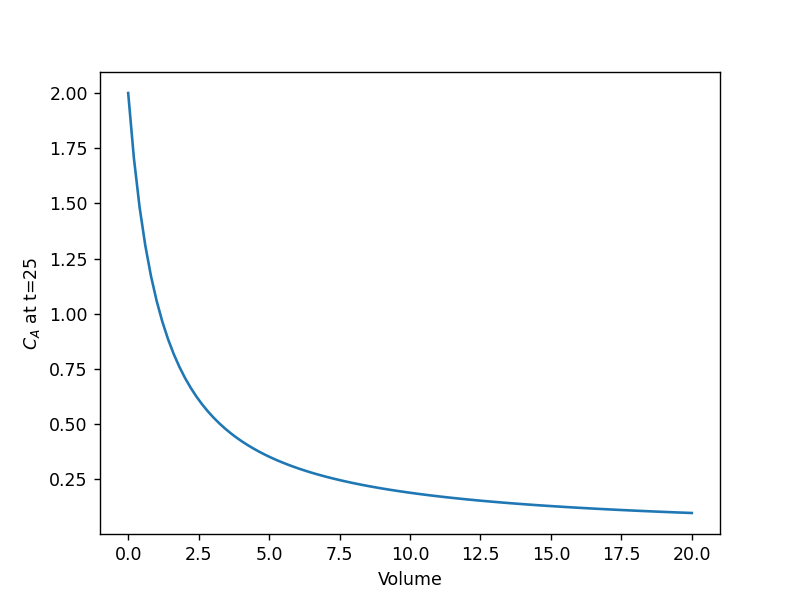

Text(0, 0.5, '$C_A$ at t=25')

In [5]:
V = V.reshape(Sp,100)
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(V[0], sol[-1,0,:])
plt.xlabel('Volume')
plt.ylabel('$C_A$ at t=25')
# plt.savefig('images/transient-pfr-1.png')
